In [6]:
import nltk
import numpy as np
from nltk.tokenize import word_tokenize
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jppad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\jppad\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [8]:
def preprocess_text(file_path):
    """
    Read and preprocess the text from a file.
    
    Args:
    file_path (str): Path to the text file
    
    Returns:
    list: List of preprocessed tokens
    """
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read().lower()
    
    # Tokenize without removing stopwords
    tokens = word_tokenize(text.lower())
    
    # Only remove non-alphanumeric tokens
    tokens = [token for token in tokens if token.isalnum()]
    
    return tokens

def create_term_term_matrix(tokens, window_size=5):
    """
    Create a term-term matrix based on co-occurrence within a specified window.
    
    Args:
    tokens (list): List of preprocessed tokens
    window_size (int): Size of the co-occurrence window
    
    Returns:
    tuple: (term-term matrix, vocabulary)
    """
    vocab = sorted(set(tokens))
    word_to_id = {word: i for i, word in enumerate(vocab)}
    
    matrix = np.zeros((len(vocab), len(vocab)), dtype=int)
    
    for i in range(len(tokens)):
        for j in range(max(0, i-window_size), min(len(tokens), i+window_size+1)):
            if i != j:
                word1, word2 = tokens[i], tokens[j]
                matrix[word_to_id[word1], word_to_id[word2]] += 1
    
    return matrix, vocab


In [10]:

def plot_heatmap(matrix, vocab, title, top_n=50):
    """
    Plot a heatmap of the term-term matrix for the top N most frequent terms.
    
    Args:
    matrix (numpy.ndarray): Term-term matrix
    vocab (list): Vocabulary list
    title (str): Title for the heatmap
    top_n (int): Number of top terms to include in the heatmap
    """
    # Get the top N most frequent terms
    term_frequencies = matrix.sum(axis=1)
    top_indices = term_frequencies.argsort()[-top_n:][::-1]
    
    top_matrix = matrix[top_indices][:, top_indices]
    top_vocab = [vocab[i] for i in top_indices]
    
    plt.figure(figsize=(15, 13))
    sns.heatmap(top_matrix, xticklabels=top_vocab, yticklabels=top_vocab, cmap='YlOrRd')
    plt.title(f'{title} (Top {top_n} Terms)')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [31]:
#A version of the heatmap that shows 50 random terms
def plot_random_heatmap(matrix, vocab, title, num_terms=50):
    """
    Plot a heatmap of the term-term matrix for a random selection of terms.
    
    Args:
    matrix (numpy.ndarray): Term-term matrix
    vocab (list): Vocabulary list
    title (str): Title for the heatmap
    num_terms (int): Number of random terms to include in the heatmap
    """
    random_indices = np.random.choice(len(vocab), num_terms, replace=False)
    random_matrix = matrix[random_indices][:, random_indices]
    random_vocab = [vocab[i] for i in random_indices]
    
    plt.figure(figsize=(15, 13))
    sns.heatmap(random_matrix, xticklabels=random_vocab, yticklabels=random_vocab, cmap='YlOrRd')
    plt.title(f'{title} (Random {num_terms} Terms)')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()



In [12]:
# Main execution
FILEPATH = os.path.join(os.getcwd(), '..', 'data')
br_constitution_path = os.path.join(FILEPATH, 'constituicao_federal_brasileira.txt')
us_constitution_path = os.path.join(FILEPATH, 'US_constitution.txt')

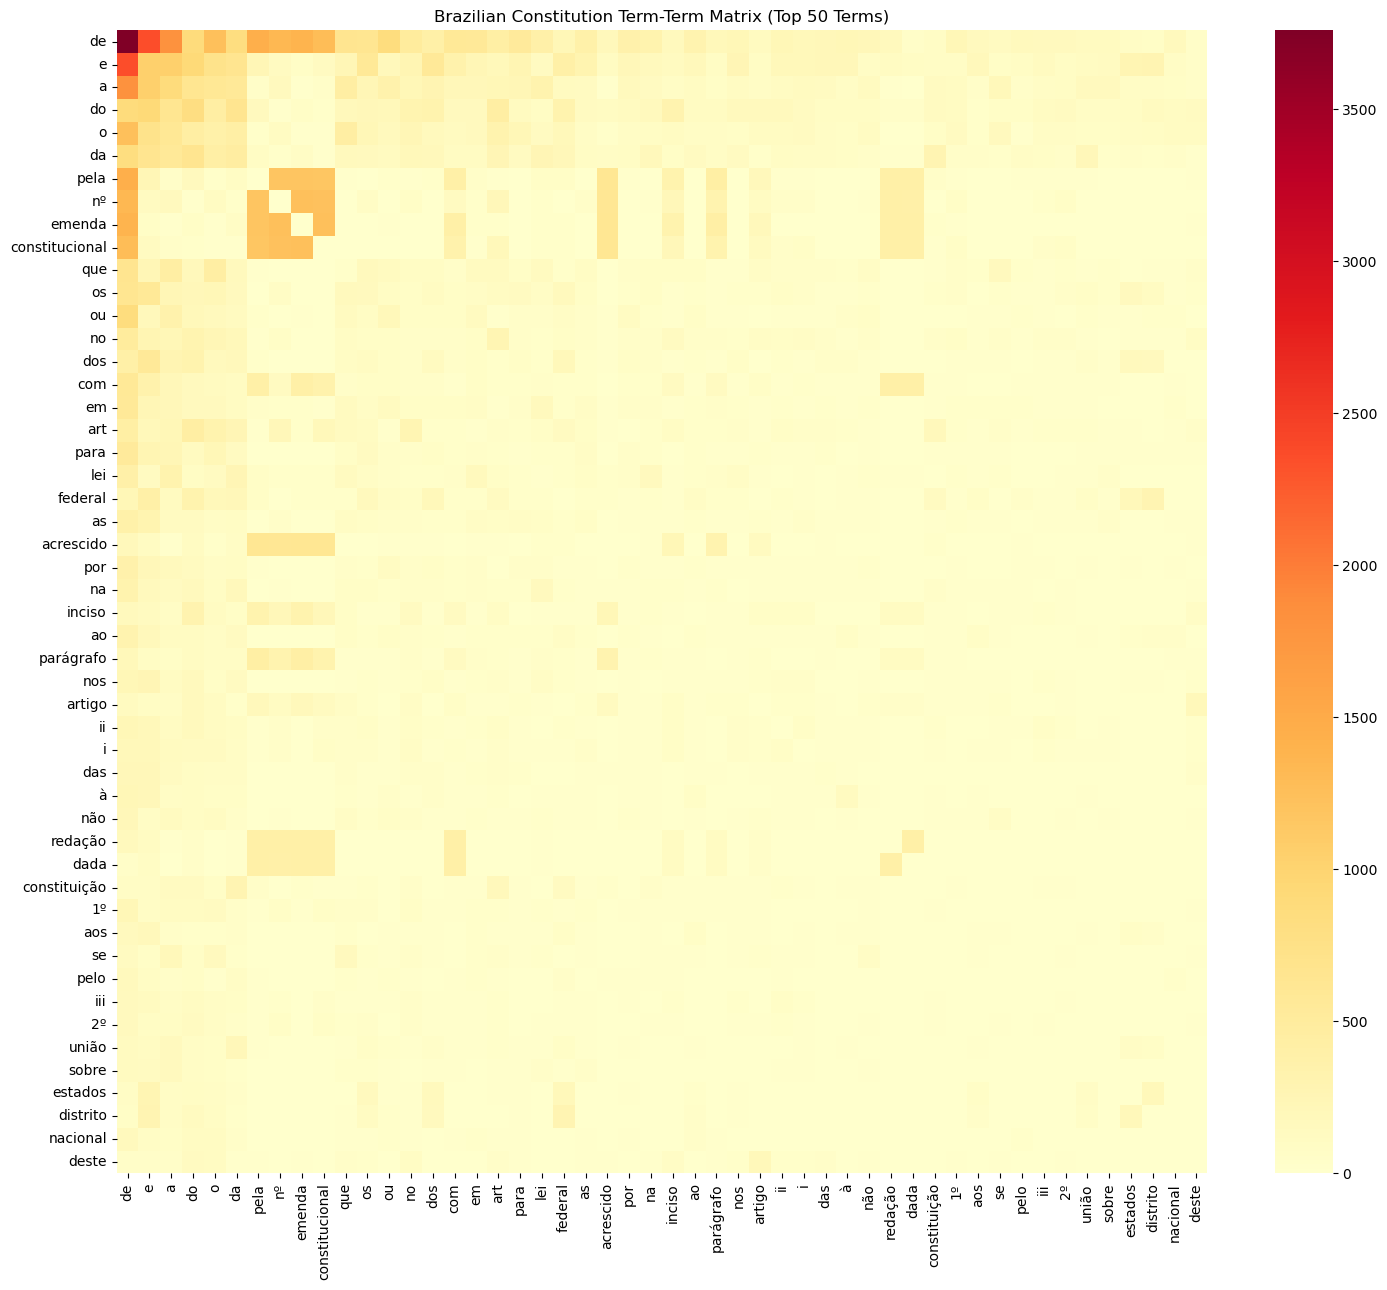

In [15]:
# Process Brazilian Constitution
br_tokens = preprocess_text(br_constitution_path)
br_matrix, br_vocab = create_term_term_matrix(br_tokens)
plot_heatmap(br_matrix, br_vocab, 'Brazilian Constitution Term-Term Matrix')


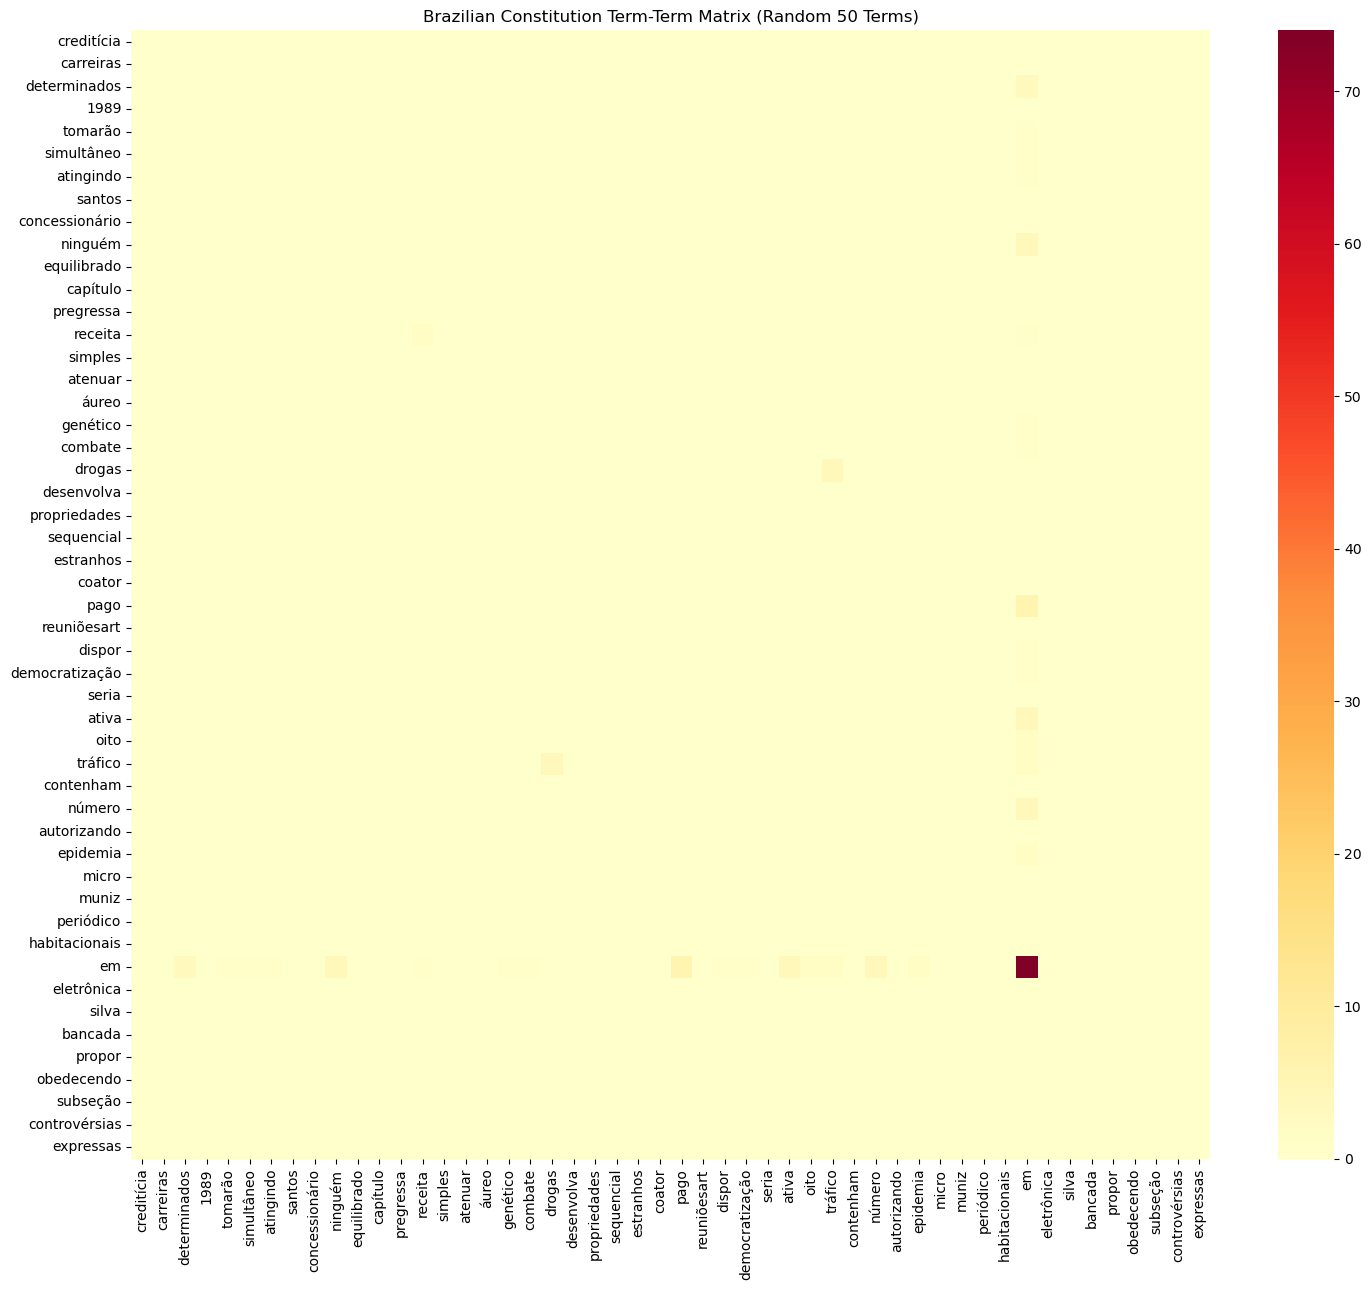

In [32]:
plot_random_heatmap(br_matrix, br_vocab, 'Brazilian Constitution Term-Term Matrix')




In [34]:
# Show how sparse the matrix is
non_zero_count = np.count_nonzero(br_matrix)
total_elements = br_matrix.size
sparsity = 1 - (non_zero_count / total_elements)

print(f"Brazilian Constitution Term-Term Matrix:")
print(f"Shape: {br_matrix.shape}")
print(f"Total elements: {total_elements}")
print(f"Non-zero elements: {non_zero_count}")
print(f"Sparsity: {sparsity:.2%}")

Brazilian Constitution Term-Term Matrix:
Shape: (7082, 7082)
Total elements: 50154724
Non-zero elements: 338966
Sparsity: 99.32%


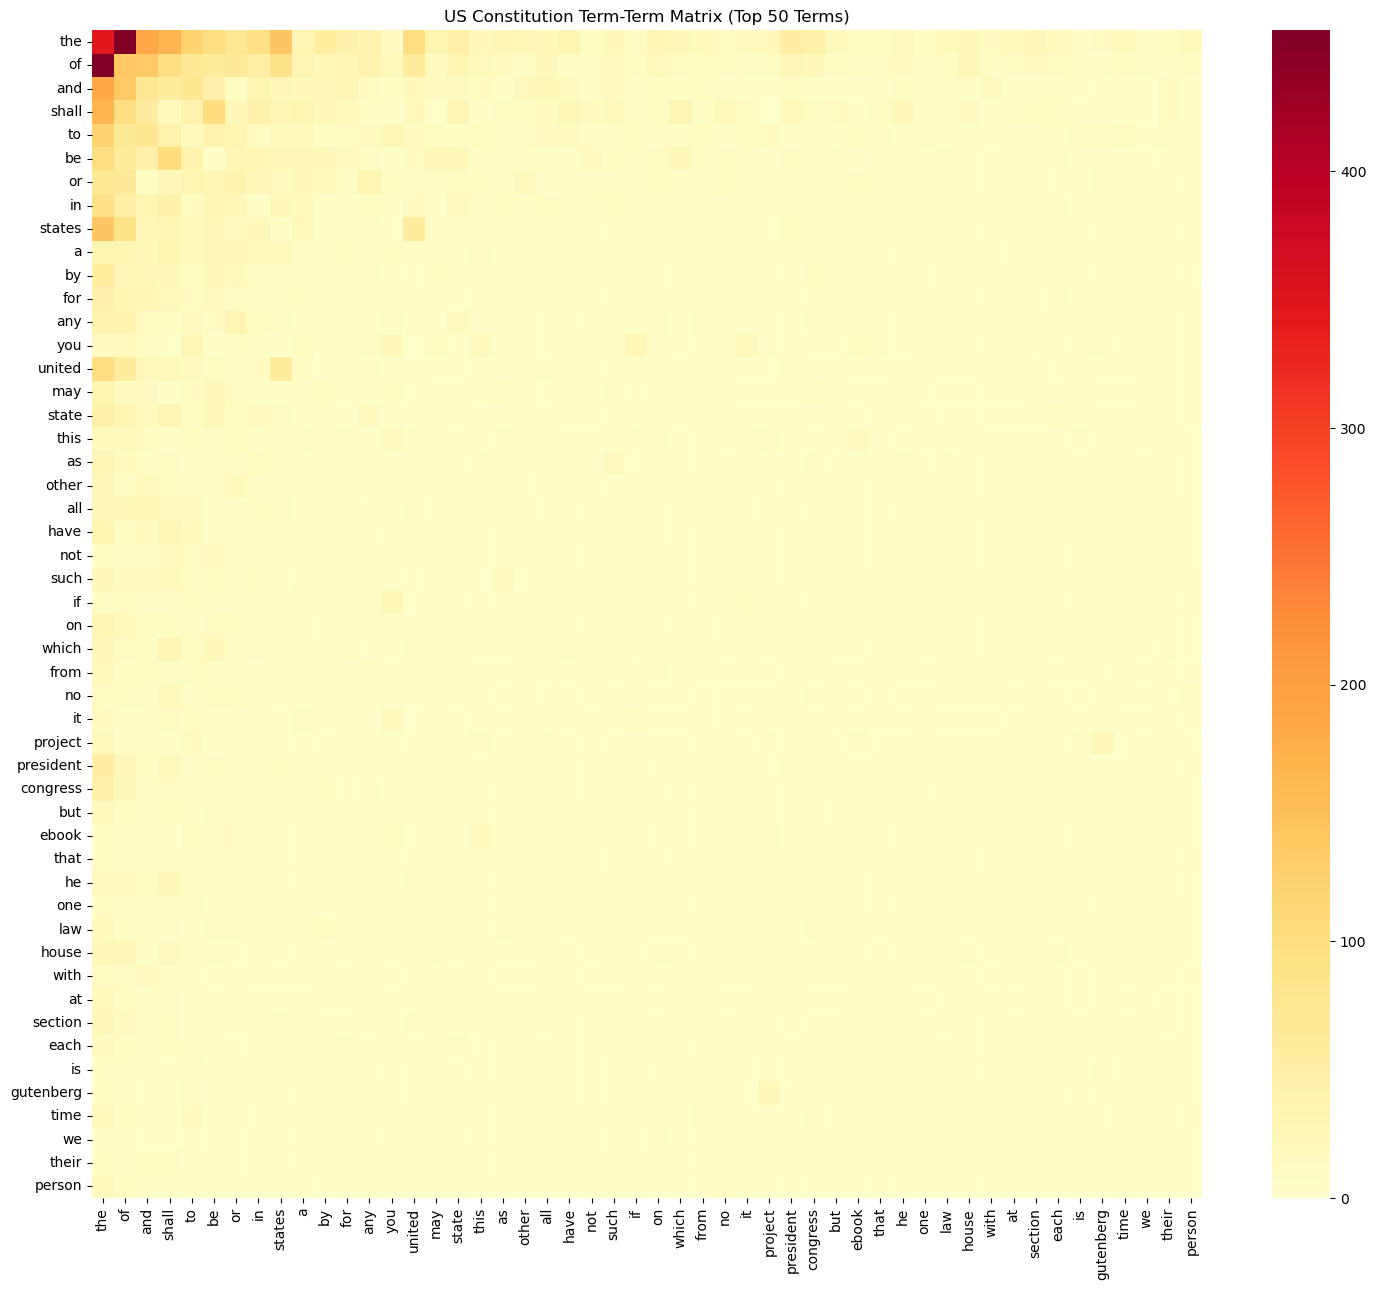

In [16]:
# Process US Constitution
us_tokens = preprocess_text(us_constitution_path)
us_matrix, us_vocab = create_term_term_matrix(us_tokens)
plot_heatmap(us_matrix, us_vocab, 'US Constitution Term-Term Matrix')


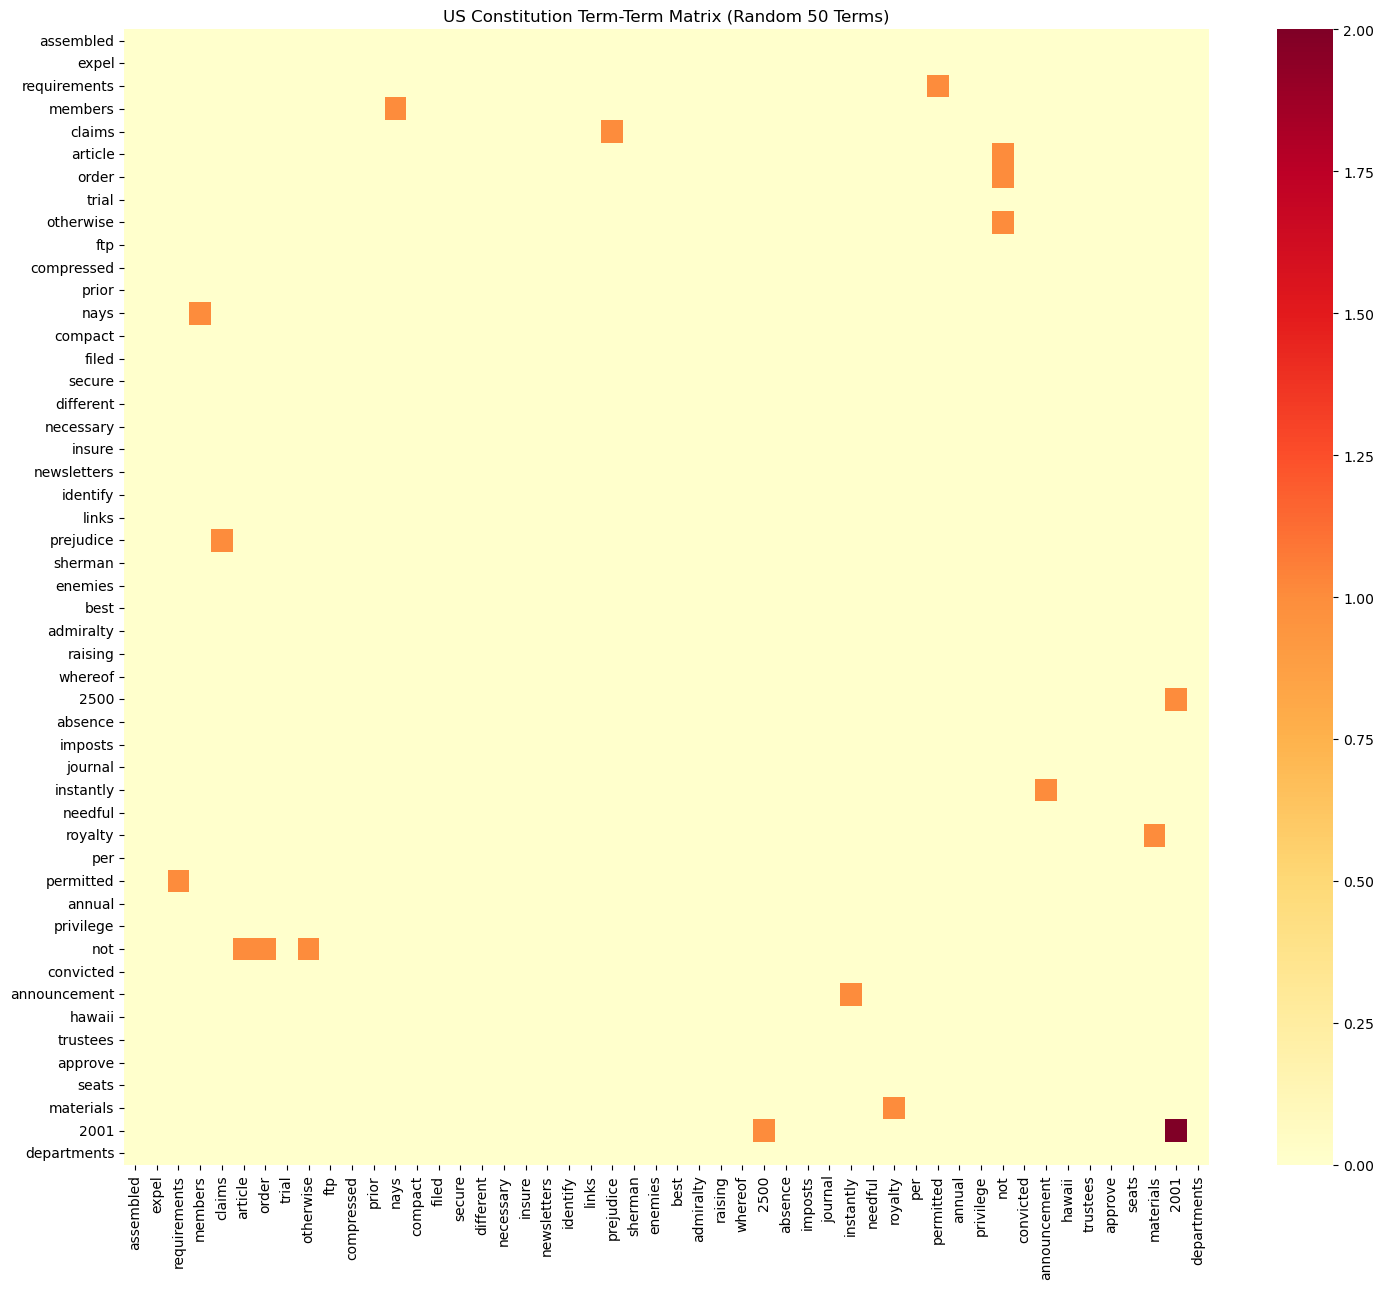

In [35]:
plot_random_heatmap(us_matrix, us_vocab, 'US Constitution Term-Term Matrix')


In [37]:
#show how sparse the matrix is
non_zero_count = np.count_nonzero(us_matrix)
total_elements = us_matrix.size
sparsity = 1 - (non_zero_count / total_elements)

print(f"US Constitution Term-Term Matrix:")
print(f"Shape: {us_matrix.shape}")
print(f"Total elements: {total_elements}")
print(f"Non-zero elements: {non_zero_count}")
print(f"Sparsity: {sparsity:.2%}")


US Constitution Term-Term Matrix:
Shape: (1428, 1428)
Total elements: 2039184
Non-zero elements: 36085
Sparsity: 98.23%


In [17]:
# Print some statistics
print(f"Brazilian Constitution: {len(br_tokens)} tokens, {len(br_vocab)} unique terms")
print(f"US Constitution: {len(us_tokens)} tokens, {len(us_vocab)} unique terms")


Brazilian Constitution: 99746 tokens, 7082 unique terms
US Constitution: 6622 tokens, 1428 unique terms


In [18]:
# Example: Find top co-occurring terms for a specific word in Brazilian Constitution
word = 'de'  # Portuguese for 'of'
if word in br_vocab:
    word_id = br_vocab.index(word)
    co_occurrences = br_matrix[word_id]
    top_10 = sorted(zip(br_vocab, co_occurrences), key=lambda x: x[1], reverse=True)[:11]
    print(f"\nTop 10 co-occurring terms with '{word}' in Brazilian Constitution:")
    for term, count in top_10[1:]:  # Skip the first one as it's the word itself
        print(f"{term}: {count}")
else:
    print(f"'{word}' not found in Brazilian Constitution vocabulary")



Top 10 co-occurring terms with 'de' in Brazilian Constitution:
e: 2362
a: 1815
pela: 1454
emenda: 1382
nº: 1351
constitucional: 1291
o: 1234
do: 880
ou: 858
da: 836


In [19]:
# Repeat for US Constitution with an English word
word = 'of'
if word in us_vocab:
    word_id = us_vocab.index(word)
    co_occurrences = us_matrix[word_id]
    top_10 = sorted(zip(us_vocab, co_occurrences), key=lambda x: x[1], reverse=True)[:11]
    print(f"\nTop 10 co-occurring terms with '{word}' in US Constitution:")
    for term, count in top_10[1:]:  # Skip the first one as it's the word itself
        print(f"{term}: {count}")
else:
    print(f"'{word}' not found in US Constitution vocabulary")


Top 10 co-occurring terms with 'of' in US Constitution:
of: 138
and: 136
shall: 97
states: 88
to: 66
or: 65
be: 61
united: 61
in: 51
any: 39


In [25]:
#represent a word as a one-dimensional vector of its co-occurrences
def word_vector(word, matrix, vocab):
    """
    Create a word vector based on co-occurrence within a specified window.
    
    Args:
    word (str): The word to create a vector for
    matrix (numpy.ndarray): Term-term matrix
    vocab (list): Vocabulary list
    
    Returns:
    numpy.ndarray: Word vector
    """
    word_id = vocab.index(word)
    word_vector = matrix[word_id]
    return word_vector




In [30]:
de_vec = word_vector('de', br_matrix, br_vocab)
print(de_vec, de_vec.shape)




[ 66  16  18 ... 100   1   0] (7082,)
